In [1]:
from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
data = load_wine()

In [3]:
data.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [4]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [5]:
data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [6]:
data.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [7]:
data.data.shape

(178, 13)

In [8]:
X = data.data[:59+71]
y = data.target[:59+71]
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [9]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [90]:
lrmodel = LogisticRegression(max_iter=30000, solver='lbfgs', penalty='none').fit(X, y)

y_pred = lrmodel.predict_proba(X)

# Calculate the log loss
lrloss = log_loss(y, y_pred)
lrloss

c:\Users\Junwei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


7.292437743946655e-07

In [11]:
# Random Coordinate Gradient Descent

In [35]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def loss_function(X, y, weight):
    m = len(y)
    y_hat = sigmoid(X @ weight)
    loss = -(1/m) * np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
    return loss

def gradient(X, y, weight):
    m = len(y)
    y_hat = sigmoid(X @ weight)
    grad = (1/m) * X.T @ (y_hat - y)
    return grad

def logistic_regression_random(X, y, weight, alpha, iterations):
    losses = []
    for i in range(iterations):
        dim_choice = random.choice(range(X.shape[1])) # 1-13 because the 0 dimension is 1
        grad = gradient(X, y, weight)
        weight[dim_choice] = weight[dim_choice] - alpha * grad[dim_choice]
        losses.append(loss_function(X, y, weight))
    return weight, losses


m, n = X.shape
X_with_intercept = np.hstack((np.ones((m, 1)), X)) # add 1 for b
initial_weight = np.zeros(n + 1)
alpha = 0.6
iterations = 100000

weight_optimal, losses_random = logistic_regression_random(X_with_intercept, y, initial_weight, alpha, iterations)

print("Optimal coefficients:", weight_optimal)
losses_random[-1]

Optimal coefficients: [-0.01019234 -4.51442149 -1.57634531 -3.35814484  4.159993   -0.63695083
  0.24028762 -1.05576247  0.59591219  0.52462264 -1.93124018  0.44993318
 -1.92150402 -5.70991547]


0.0008754928944066214

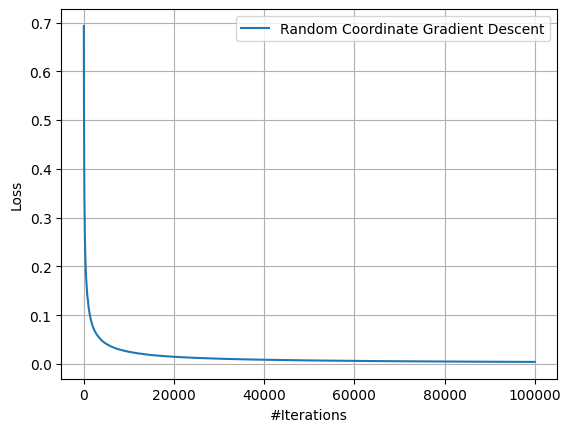

In [13]:
plt.plot(range(100000), losses_random, label = 'Random Coordinate Gradient Descent')
plt.xlabel('#Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# select the coordinate with the highest gradient in every iteration

In [48]:
def logistic_regression_max_gradient(X, y, weight, alpha, iterations):
    losses = []
    for i in range(iterations):
        grad = gradient(X, y, weight)
        dim_choice = np.where(np.abs(grad) == max(np.abs(grad)))[0]
        weight[dim_choice] = weight[dim_choice] - alpha * grad[dim_choice]
        losses.append(loss_function(X, y, weight))
    return weight, losses


m, n = X.shape
X_with_intercept = np.hstack((np.ones((m, 1)), X)) # add 1 for b
initial_weight = np.zeros(n + 1)
alpha = 0.8
iterations = 100000

weight_optimal, losses_maxgrad = logistic_regression_max_gradient(X_with_intercept, y, initial_weight, alpha, iterations)

print("Optimal coefficients:", weight_optimal)
losses_maxgrad[-1]

Optimal coefficients: [ 0.         -5.53427981 -1.81007106 -3.91729472  4.78450629  0.
  0.         -1.68792873  0.          0.         -0.96709127  0.51556643
 -2.06459108 -8.16463638]


0.0003061228477553144

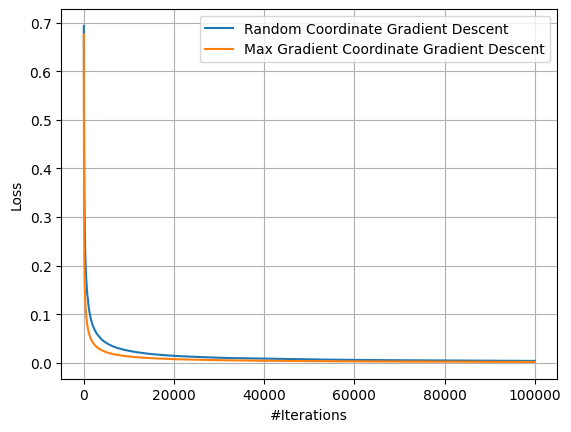

In [16]:
plt.plot(range(100000), losses_random, label = 'Random Coordinate Gradient Descent')
plt.plot(range(100000), losses_maxgrad, label = 'Max Gradient Coordinate Gradient Descent')
plt.xlabel('#Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
# select the coordinate with the highest gradient for several iterations in a row

In [18]:
def logistic_regression_max_gradient_fix(X, y, weight, alpha, iterations):
    losses = []
    fix = 20
    for i in range(fix):
        grad = gradient(X, y, weight)
        dim_choice = np.where(np.abs(grad) == max(np.abs(grad)))[0]
        for _ in range(iterations//fix):
            grad = gradient(X, y, weight)
            weight[dim_choice] = weight[dim_choice] - alpha * grad[dim_choice]
            losses.append(loss_function(X, y, weight))
    return weight, losses


m, n = X.shape
X_with_intercept = np.hstack((np.ones((m, 1)), X)) # add 1 for b
initial_weight = np.zeros(n + 1)
alpha = 0.1
iterations = 100000

weight_optimal, losses_maxgrad_fix = logistic_regression_max_gradient_fix(X_with_intercept, y, initial_weight, alpha, iterations)

print("Optimal coefficients:", weight_optimal)
losses_maxgrad_fix[-1]

Optimal coefficients: [ 0.         -3.56829504 -1.04347932 -2.52319992  2.9411037   0.20470342
  0.         -0.80324613  0.          0.         -0.44763387  0.41569787
 -1.58305599 -5.24808549]


0.0028245570139384993

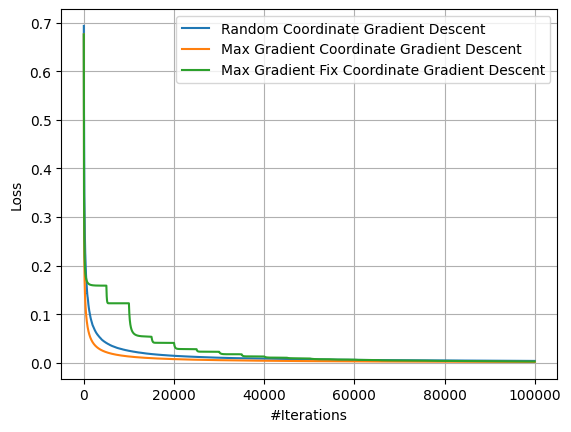

In [19]:
plt.plot(range(100000), losses_random, label = 'Random Coordinate Gradient Descent')
plt.plot(range(100000), losses_maxgrad, label = 'Max Gradient Coordinate Gradient Descent')
plt.plot(range(100000), losses_maxgrad_fix, label = 'Max Gradient Fix Coordinate Gradient Descent')
plt.xlabel('#Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
# select the coordinate with the highest second order derivative

In [21]:
def hessian(X, y, weight):
    m = len(y)
    y_hat = sigmoid(X @ weight)
    P = np.diag(y_hat)
    hessian = (1/m) * (-X.T) @ (P - P**2) @ X
    return hessian

In [22]:
X_with_intercept = np.hstack((np.ones((m, 1)), X)) # add 1 for b
initial_weight = np.zeros(n + 1)
np.diag(hessian(X_with_intercept, y, initial_weight)).shape

(14,)

In [23]:
def logistic_regression_max_second_deri(X, y, weight, alpha, iterations):
    hessian_diag = np.diag(hessian(X, y, weight)) # doesn't change much during gradient descent
    sorted_indices = np.argsort([second for second in -np.abs(hessian_diag)])
    choose_from = [] # imbalanced list to perform random choice which favors dimensions with high hessian
    for j in range(7):
        for _ in range(7-j):
            choose_from.append(sorted_indices[2*j])
            choose_from.append(sorted_indices[2*j+1])
    losses = []
    for i in range(iterations):
        grad = gradient(X, y, weight)
        dim_choice = random.choice(choose_from)
        weight[dim_choice] = weight[dim_choice] - alpha * grad[dim_choice]
        losses.append(loss_function(X, y, weight))
    return weight, losses


m, n = X.shape
X_with_intercept = np.hstack((np.ones((m, 1)), X)) # add 1 for b
initial_weight = np.zeros(n + 1)
alpha = 0.1
iterations = 100000

weight_optimal, losses_maxsecond = logistic_regression_max_second_deri(X_with_intercept, y, initial_weight, alpha, iterations)

print("Optimal coefficients:", weight_optimal)
losses_maxsecond[-1]

Optimal coefficients: [ 0.01351733 -2.0506194  -1.41940267 -1.60842911  2.29353035 -0.20264002
 -0.03799858 -0.26851541 -0.35246339  0.33265385 -2.00849114  0.33128209
 -1.60226439 -5.62578763]


0.004592224118332842

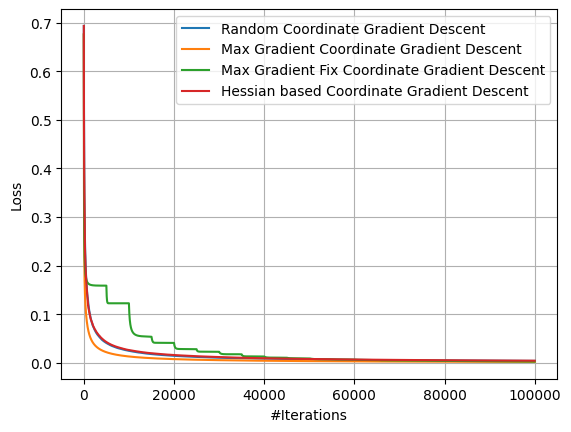

In [24]:
plt.plot(range(100000), losses_random, label = 'Random Coordinate Gradient Descent')
plt.plot(range(100000), losses_maxgrad, label = 'Max Gradient Coordinate Gradient Descent')
plt.plot(range(100000), losses_maxgrad_fix, label = 'Max Gradient Fix Coordinate Gradient Descent')
plt.plot(range(100000), losses_maxsecond, label = 'Hessian based Coordinate Gradient Descent')
plt.xlabel('#Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [74]:
def backtracking_line_search(X, y, beta, alpha, rho, c, dim_choice):
    """
    X: Feature matrix
    y: Target variable
    beta: Parameters
    alpha: Initial step size
    rho: Shrinkage factor (0 < rho < 1)
    c: Armijo-Goldstein condition constant (0 < c < 1)
    """
    grad = gradient(X, y, beta)
    while True:
        new_beta = beta
        new_beta[dim_choice] -= alpha * grad[dim_choice]
        # if loss_function(X, y, new_beta) <= loss_function(X, y, beta) - c * alpha * np.linalg.norm(grad) ** 2:
        if loss_function(X, y, new_beta) <= loss_function(X, y, beta) - c * alpha * (grad[dim_choice] ** 2):
            break
        alpha *= rho
    return alpha

In [80]:
def logistic_regression_max_gradient_backtrack(X, y, weight, alpha, iterations):
    losses = [loss_function(X, y, weight)]
    for i in range(iterations):
        grad = gradient(X, y, weight)
        dim_choice = np.where(np.abs(grad) == max(np.abs(grad)))[0]
        alpha_backtrack = backtracking_line_search(X, y, weight, alpha, 0.8, 1e-8, dim_choice)
        # if not i % 1000:
        #     print("running iteration " + str(i) + " alpha " + str(alpha_backtrack))
        # print()
        weight[dim_choice] = weight[dim_choice] - alpha_backtrack * grad[dim_choice]
        losses.append(loss_function(X, y, weight))
    return weight, losses


m, n = X.shape
X_with_intercept = np.hstack((np.ones((m, 1)), X)) # add 1 for b
initial_weight = np.zeros(n + 1)
alpha = 0.1
iterations = 30000

weight_optimal, losses_backtrack = logistic_regression_max_gradient_backtrack(X_with_intercept, y, initial_weight, alpha, iterations)

print("Optimal coefficients:", weight_optimal)
losses_backtrack[-1]

Optimal coefficients: [ 0.         -4.07636843 -1.36038722 -2.87016954  3.50809448  0.
  0.         -0.95937406  0.          0.         -0.87534204  0.34074806
 -1.64021978 -6.07426164]


0.0014358343815525033

In [79]:
def logistic_regression_random_backtrack(X, y, weight, alpha, iterations):
    losses = [loss_function(X, y, weight)]
    for i in range(iterations):
        dim_choice = random.choice(range(X.shape[1])) # 1-13 because the 0 dimension is 1
        grad = gradient(X, y, weight)
        alpha_backtrack = backtracking_line_search(X, y, weight, alpha, 0.8, 1e-8, dim_choice)
        weight[dim_choice] = weight[dim_choice] - alpha_backtrack * grad[dim_choice]
        losses.append(loss_function(X, y, weight))
    return weight, losses


m, n = X.shape
X_with_intercept = np.hstack((np.ones((m, 1)), X)) # add 1 for b
initial_weight = np.zeros(n + 1)
alpha = 0.1
iterations = 30000

weight_optimal, losses_random_backtrack = logistic_regression_random_backtrack(X_with_intercept, y, initial_weight, alpha, iterations)

print("Optimal coefficients:", weight_optimal)
losses_random_backtrack[-1]

Optimal coefficients: [ 0.07451973 -3.43858107 -1.2163586  -2.49730156  3.1767882  -0.53343753
  0.09314189 -0.71222169  0.43041291  0.44618094 -1.5697851   0.30283513
 -1.53240039 -4.17879481]


0.002948074443128636

In [84]:
def logistic_regression_max_gradient(X, y, weight, alpha, iterations):
    losses = [loss_function(X, y, weight)]
    for i in range(iterations):
        grad = gradient(X, y, weight)
        dim_choice = np.where(np.abs(grad) == max(np.abs(grad)))[0]
        weight[dim_choice] = weight[dim_choice] - alpha * grad[dim_choice]
        losses.append(loss_function(X, y, weight))
    return weight, losses


m, n = X.shape
X_with_intercept = np.hstack((np.ones((m, 1)), X)) # add 1 for b
initial_weight = np.zeros(n + 1)
alpha = 0.1
iterations = 30000

weight_optimal, losses_maxgrad = logistic_regression_max_gradient(X_with_intercept, y, initial_weight, alpha, iterations)

print("Optimal coefficients:", weight_optimal)
losses_maxgrad[-1]

Optimal coefficients: [ 0.         -2.88236633 -0.97952225 -1.95820682  2.38723895  0.
  0.         -0.35705821  0.          0.         -0.8427686   0.17303966
 -1.23809038 -4.34481325]


0.005655972497975689

In [85]:
def logistic_regression_random(X, y, weight, alpha, iterations):
    losses = [loss_function(X, y, weight)]
    for i in range(iterations):
        dim_choice = random.choice(range(X.shape[1])) # 1-13 because the 0 dimension is 1
        grad = gradient(X, y, weight)
        weight[dim_choice] = weight[dim_choice] - alpha * grad[dim_choice]
        losses.append(loss_function(X, y, weight))
    return weight, losses


m, n = X.shape
X_with_intercept = np.hstack((np.ones((m, 1)), X)) # add 1 for b
initial_weight = np.zeros(n + 1)
alpha = 0.1
iterations = 30000

weight_optimal, losses_random = logistic_regression_random(X_with_intercept, y, initial_weight, alpha, iterations)

print("Optimal coefficients:", weight_optimal)
losses_random[-1]

Optimal coefficients: [ 0.16462348 -2.51160964 -0.80306178 -1.56118727  1.94678022 -0.36747421
  0.05643627 -0.46832569  0.24581992  0.28802841 -1.29189992  0.28184155
 -0.96516871 -2.87188521]


0.01077274065853887

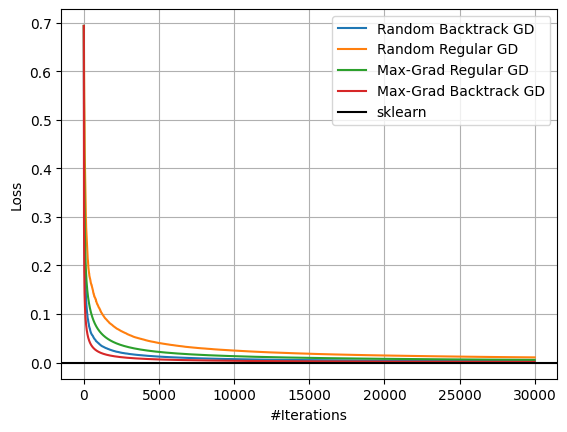

In [89]:
plt.plot(range(30001), losses_random_backtrack, label = 'Random Backtrack GD')
plt.plot(range(30001), losses_random, label = 'Random Regular GD')
plt.plot(range(30001), losses_maxgrad, label = 'Max-Grad Regular GD')
plt.plot(range(30001), losses_backtrack, label = 'Max-Grad Backtrack GD')
plt.axhline(y=lrloss, label='sklearn', color = 'black')
plt.xlabel('#Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()